In [151]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
# Import data set into a Pandas dataframe.
df = pd.read_csv('avocado.csv')
# Show the first 5 rows of the dataframe.
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# Get a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
# We can also get a list of column names.
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [11]:
# We already have indexes from Pandas dataframe
# so we will drop the Unnamed column
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [14]:
# Look at the quantiles of the Average Price column.
df['AveragePrice'].quantile([.0, 0.001, 0.25, .5, 0.75, 0.999, 1])

0.000    0.44000
0.001    0.53248
0.250    1.10000
0.500    1.37000
0.750    1.66000
0.999    2.92752
1.000    3.25000
Name: AveragePrice, dtype: float64

In [22]:
# Change Date column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [26]:
# See how many types of avocados there are.
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [28]:
# Change type column to category
df['type'] = df['type'].astype('category')
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                  category
year                     int64
region                  object
dtype: object

In [58]:
# Get a sorted list of average price by region
price_by_region = df.groupby(df['region'])['AveragePrice'].mean().sort_values()
price_by_region.head(10)

region
Houston             1.047929
DallasFtWorth       1.085592
SouthCentral        1.101243
CincinnatiDayton    1.209201
Nashville           1.212101
LosAngeles          1.216006
Denver              1.218580
PhoenixTucson       1.224438
Roanoke             1.247929
Columbus            1.252781
Name: AveragePrice, dtype: float64

<BarContainer object of 10 artists>

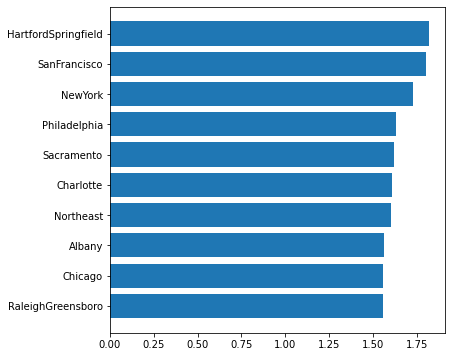

In [60]:
# Graph a horizontal bar graph for avg avocado price by region
fig, ax = plt.subplots(figsize=(6, 6))
plt.barh(price_by_region.index[-10:], price_by_region[-10:])

(array([ 331., 2632., 4824., 4506., 3412., 1672.,  598.,  177.,   86.,
          11.]),
 array([0.44 , 0.721, 1.002, 1.283, 1.564, 1.845, 2.126, 2.407, 2.688,
        2.969, 3.25 ]),
 <BarContainer object of 10 artists>)

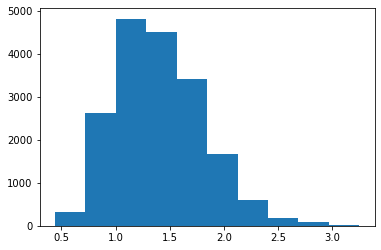

In [61]:
# Plot a histogram for Average Price
plt.hist(df['AveragePrice'])

In [69]:
# Get 2 lists of average price by type
con = df[df['type'] == 'conventional']['AveragePrice'].values
org = df[df['type'] == 'organic']['AveragePrice'].values

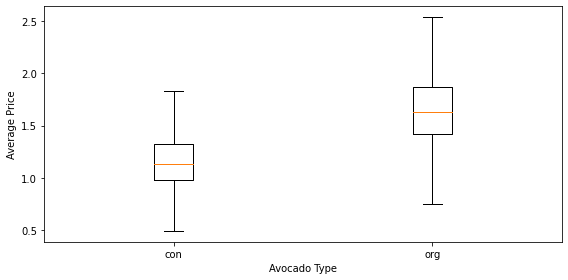

In [75]:
# Graph a box-whisker plot for average price by type
fig, ax = plt.subplots(figsize=(8, 4))
ax.boxplot([con, org], showfliers=False)  # don't show outliers
ax.set_xticks(range(1, 3))  # need 4 to get 3 ticks
ax.set_xticklabels(['con', 'org'])  # set tick labels on the X axis
ax.set_xlabel("Avocado Type")
ax.set_ylabel("Average Price")
plt.tight_layout()
plt.show()

In [109]:
# Get total volume and average price by year
volume_by_year = df.groupby(df['year'])['Total Volume'].mean()
# scale volumn down by divide values by 1000
volume_by_year = volume_by_year/10**3
avg_price_by_year = df.groupby(df['year'])['AveragePrice'].mean()
avg_price_by_year

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

Text(0, 0.5, 'Average Price')

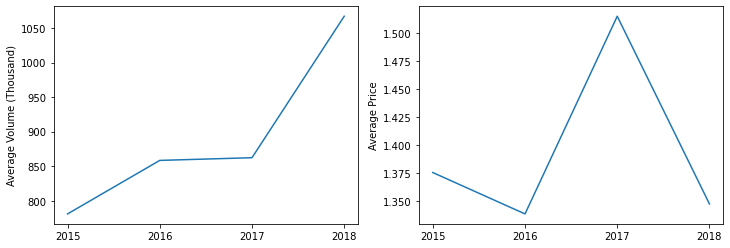

In [110]:
# Average volume sold per day by year
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].plot(volume_by_year)
axes[0].set_xticks(range(2015, 2019))
axes[0].set_ylabel('Average Volume (Thousand)')

axes[1].plot(avg_price_by_year)
axes[1].set_xticks(range(2015, 2019))
axes[1].set_ylabel('Average Price')

In [99]:
# The data is only up to March 2018
df['Date'].max()

Timestamp('2018-03-25 00:00:00')

In [155]:
# Create a dictionary whose keys are the regions
# and whose values are total volumnes of avocados sold by region
volume_region = df.groupby(df['region'])['Total Volume'].sum()
region = volume_region.index.to_list()
total_volume = volume_region.to_list()
volumn_dict = {region[i]: total_volume[i] for i in range(len(volume_region))}
volumn_dict

{'Albany': 16067799.97,
 'Atlanta': 88605118.85,
 'BaltimoreWashington': 134713919.32,
 'Boise': 14413187.75,
 'Boston': 97273984.83,
 'BuffaloRochester': 22962470.4,
 'California': 1028981653.17,
 'Charlotte': 35555544.42,
 'Chicago': 133702338.51,
 'CincinnatiDayton': 44522007.57,
 'Columbus': 29993361.42,
 'DallasFtWorth': 208419286.55,
 'Denver': 138902535.99,
 'Detroit': 63422419.38,
 'GrandRapids': 30211735.93,
 'GreatLakes': 589642549.29,
 'HarrisburgScranton': 41808858.68,
 'HartfordSpringfield': 50670537.46,
 'Houston': 203167867.8,
 'Indianapolis': 30263391.43,
 'Jacksonville': 28790004.74,
 'LasVegas': 54376906.4,
 'LosAngeles': 507896547.63,
 'Louisville': 16097002.4,
 'MiamiFtLauderdale': 97673224.03,
 'Midsouth': 508349357.2,
 'Nashville': 35612089.23,
 'NewOrleansMobile': 45695136.58,
 'NewYork': 240734127.53,
 'Northeast': 713280909.5600001,
 'NorthernNewEngland': 71532894.11,
 'Orlando': 58660703.89,
 'Philadelphia': 71838798.18,
 'PhoenixTucson': 195643312.5,
 'Pittsb

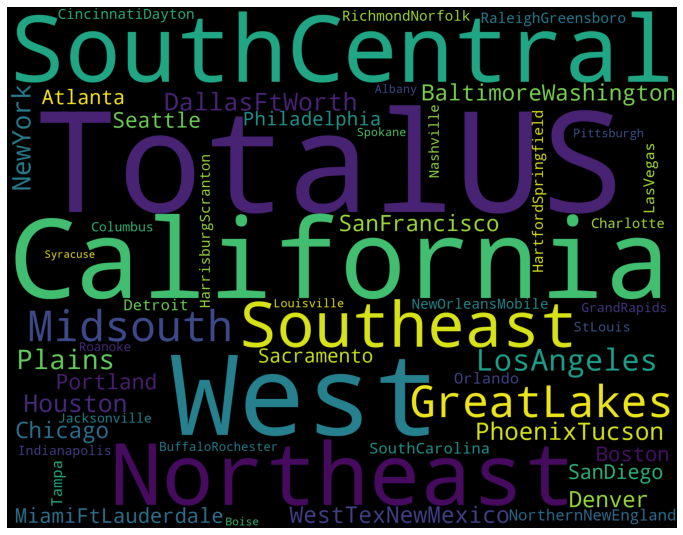

In [156]:
# Create a word cloud to illustrate the regions
# with the highest consumption of avocados
fig, ax = plt.subplots(figsize=(12, 12))
wordcloud = WordCloud(width=1800,
                      height=1400,
                      max_words=10000,
                      random_state=1,
                      relative_scaling=0.25)

wordcloud.fit_words(volumn_dict)

ax.imshow(wordcloud)
ax.axis("off")
plt.show()

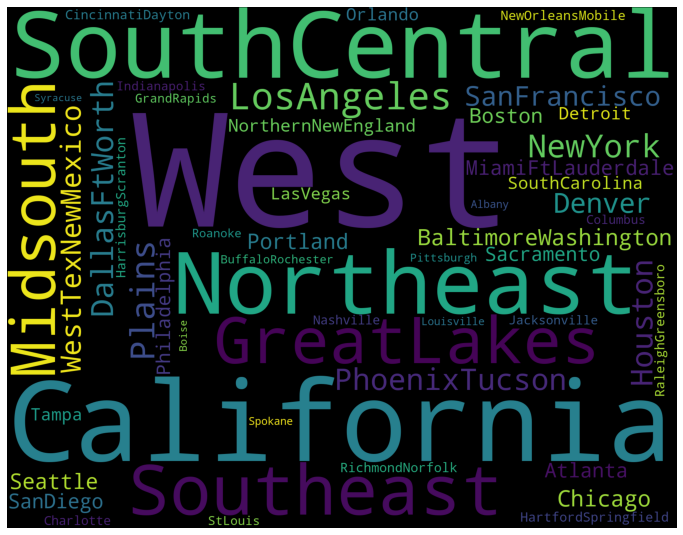

In [157]:
# Remove TotalUS from volumn_dict
volumn_dict.pop('TotalUS')

# Create a word cloud to illustrate the regions
# with the highest consumption of avocados (excluding TotalUS)
fig, ax = plt.subplots(figsize=(12, 12))
wordcloud = WordCloud(width=1800,
                      height=1400,
                      max_words=10000,
                      random_state=1,
                      relative_scaling=0.25)

wordcloud.fit_words(volumn_dict)

ax.imshow(wordcloud)
ax.axis("off")
plt.show()